In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from pathlib import Path

# Small style adjustments for more readable plots
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 14

/tmp/ipykernel_8144/187724789.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec

import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

In [23]:
# load the dataset
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")
ds

<xarray.Dataset>
Dimensions:           (time: 6443, lat: 251, lon: 234)
Coordinates:
  * lat               (lat) float32 33.0 33.06 33.12 33.18 ... 47.88 47.94 48.0
  * lon               (lon) float32 -132.0 -131.9 -131.9 ... -118.1 -118.0
  * time              (time) datetime64[ns] 2002-06-01T09:00:00 ... 2020-01-2...
Data variables:
    analysed_sst      (time, lat, lon) float32 ...
    analysis_error    (time, lat, lon) float32 ...
    mask              (time, lat, lon) float32 ...
    sea_ice_fraction  (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:                CF-1.7
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    ...                         ...
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    time_coverage_end:          20200116T210000Z
    time_coverage_start:        20200115T210000Z
    title:                      Daily MUR SST, Final product
    uuid:                       27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:      -180.0

Figure 2b: Maximum anomaly month.

In [34]:
# get the analysed sst data
analysed_sst = ds['analysed_sst']

# get reference sst (2002-2012)
sst_ref = analysed_sst.sel(time=slice("2002-01-01","2012-12-31"))

# get reference monthly avg climatology for 2002-2012
mean_climatology = sst_ref.groupby('time.dayofyear').mean()

# Subset of target date range June 2013 to July 2016
sst_2013_2016 = analysed_sst.sel(time=slice('2013-06-01', '2016-07-31')).groupby('time.dayofyear')

# Calculating Anomalies
anomalies = (sst_2013_2016 - mean_climatology).idxmax('time').dt.month

anomalies

<xarray.DataArray 'month' (lat: 251, lon: 234)>
array([[ 3.,  3.,  3., ..., 10., 10., 10.],
       [ 3.,  3.,  3., ..., 10., 10., 10.],
       [ 3.,  3.,  3., ..., 10., 10., 10.],
       ...,
       [ 7.,  6.,  6., ..., nan, nan, nan],
       [ 7.,  7.,  6., ..., nan, nan, nan],
       [ 7.,  7.,  7., ..., nan, nan, nan]])
Coordinates:
    dayofyear  (lat, lon) int64 85 85 85 85 85 85 85 ... 152 152 152 152 152 152
  * lat        (lat) float32 33.0 33.06 33.12 33.18 ... 47.82 47.88 47.94 48.0
  * lon        (lon) float32 -132.0 -131.9 -131.9 ... -118.1 -118.1 -118.0

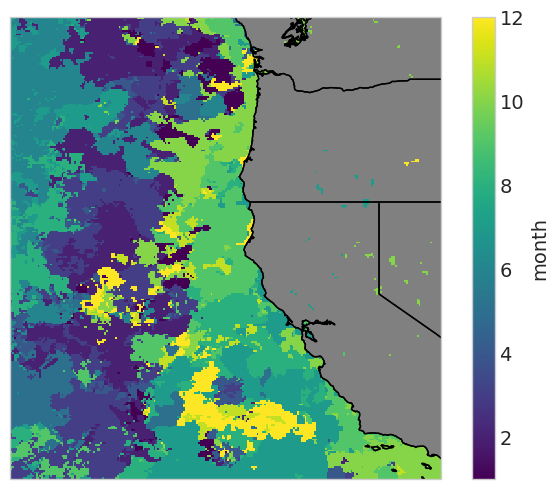

In [37]:
anomalies.plot()

# Plot on a map
ax = plt.subplot(projection=crs)
anomalies.plot(ax=ax, transform=crs)
ax.coastlines("10m", color="k")
ax.add_feature(cfeature.LAND, color="grey")
ax.add_feature(cfeature.STATES.with_scale("10m"))